<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/Copy_of_Classification_logistic_regression_tf_diabetes_jun_20_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
This code classify diabetes according to logistic regression using tensor flow
It correspond a neural network containing only one neuron 
The neuron has activation function type sigmoid
'''

'\nThis code classify diabetes according to logistic regression using tensor flow\nIt correspond a neural network containing only one neuron \nThe neuron has activation function type sigmoid\n'

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [ ]:
df=pd.read_csv("Pima_diabetes.txt",sep='\t')
# df=pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
!ls

diabetes.csv  Pima_diabetes.txt  README.md


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data_target = df['Outcome']
data_X = df.drop(['Outcome'],axis=1 )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_target, test_size = 0.33)

In [ ]:
N,D = X_train.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))


In [ ]:
model.compile(optimizer = 'adam', 
              loss  ='binary_crossentropy', 
              metrics = 'accuracy')

In [ ]:
r = model.fit(X_train,y_train, 
              validation_data=(X_test,y_test),
              epochs = 100, verbose=0)  # verbose = 1 will show the epochs

In [ ]:
print('loss and accuray train=',model.evaluate(X_train,y_train))
print('loss and accuray test=',model.evaluate(X_test,y_test))

17/17 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.7938
loss and accuray train= [0.46053946018218994, 0.7937743067741394]
8/8 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7559
loss and accuray test= [0.5272250771522522, 0.7559055089950562]


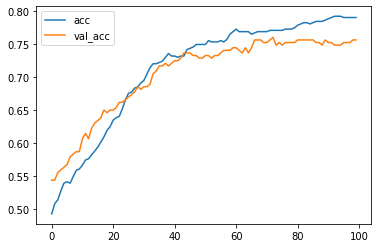

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

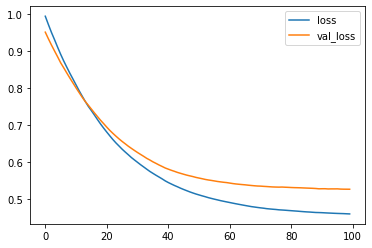

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
pred_test

array([[0.31330347],
       [0.5618536 ],
       [0.41373777],
       [0.06479678],
       [0.25573462],
       [0.07699972],
       [0.13130924],
       [0.39251715],
       [0.662907  ],
       [0.4989786 ],
       [0.14962602],
       [0.3509615 ],
       [0.09293792],
       [0.62050325],
       [0.39868993],
       [0.6108231 ],
       [0.6491156 ],
       [0.33491066],
       [0.21543282],
       [0.43926346],
       [0.38870165],
       [0.22390819],
       [0.5822554 ],
       [0.20498526],
       [0.02959839],
       [0.08156735],
       [0.34988675],
       [0.15755388],
       [0.20060208],
       [0.13209614],
       [0.7208086 ],
       [0.14549112],
       [0.33203417],
       [0.10090759],
       [0.1756849 ],
       [0.23516867],
       [0.36369625],
       [0.61283535],
       [0.26381695],
       [0.5373993 ],
       [0.5291062 ],
       [0.36907732],
       [0.3721831 ],
       [0.76975715],
       [0.19028175],
       [0.3261532 ],
       [0.2532294 ],
       [0.121

In [ ]:
pred_train = model.predict_classes(X_train)
pred_test = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pred_train = (model.predict(X_train) > 0.5).astype("int32")
pred_test = (model.predict(X_train) > 0.5).astype("int32")

In [ ]:
print('\n\n', 
      classification_report(y_train, pred_train,
                            target_names=['normal', 'diabetes']))



               precision    recall  f1-score   support

      normal       0.82      0.89      0.85       343
    diabetes       0.73      0.60      0.66       171

    accuracy                           0.79       514
   macro avg       0.77      0.74      0.76       514
weighted avg       0.79      0.79      0.79       514

